In [1]:
from scipy import stats

In [2]:
class capa():
  def __init__(self, n_neuronas_capa_anterior, n_neuronas, funcion_act):
    self.funcion_act = funcion_act
    self.b  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas).reshape(1,n_neuronas),3)
    self.W  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas * n_neuronas_capa_anterior).reshape(n_neuronas_capa_anterior,n_neuronas),3)

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

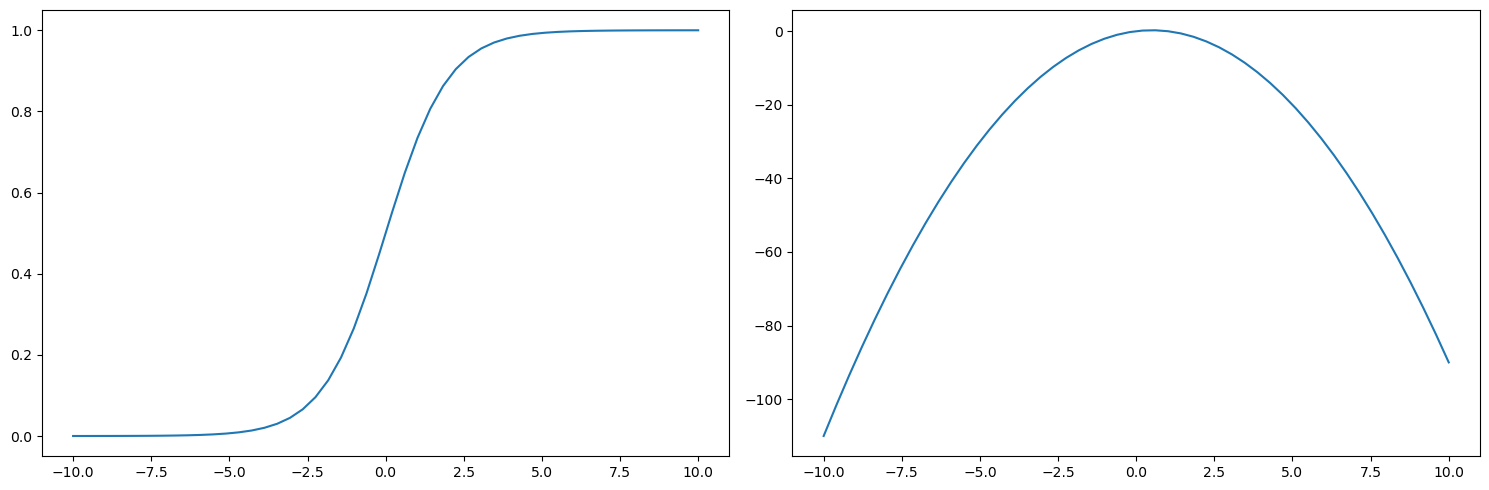

In [4]:
sigmoid = (
  lambda x:1 / (1 + np.exp(-x)),
  lambda x:x * (1 - x)
  )

rango = np.linspace(-10,10).reshape([50,1])
datos_sigmoide = sigmoid[0](rango)
datos_sigmoide_derivada = sigmoid[1](rango)

#Se Creo los graficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rango, datos_sigmoide)
axes[1].plot(rango, datos_sigmoide_derivada)
fig.tight_layout()

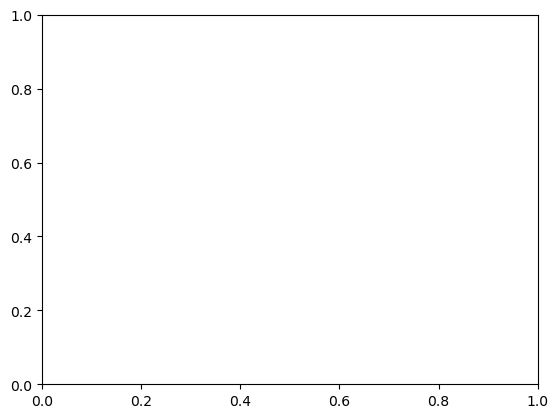

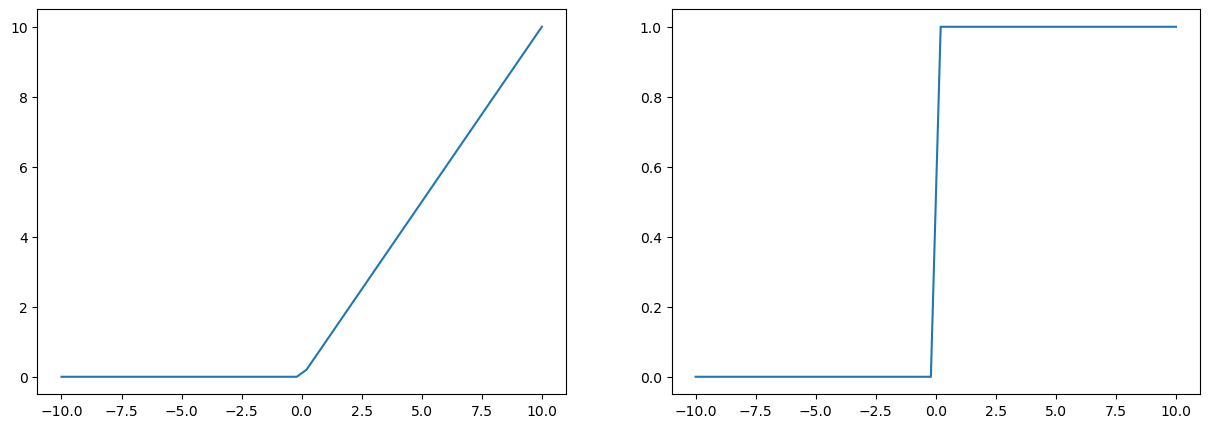

In [5]:
def derivada_relu(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x

relu = (
  lambda x: x * (x > 0),
  lambda x:derivada_relu(x)
  )

datos_relu = relu[0](rango)
datos_relu_derivada = relu[1](rango)


# Se vuelve a definir rango que ha sido cambiado
rango = np.linspace(-10,10).reshape([50,1])

# Se crean los graficos
plt.cla()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rango, datos_relu[:,0])
axes[1].plot(rango, datos_relu_derivada[:,0])
plt.show()

In [6]:
# Numero de neuronas en cada capa. 
# El primer valor es el numero de columnas de la capa de entrada.
neuronas = [2,4,8,1] 

# Funciones de activacion usadas en cada capa. 
funciones_activacion = [relu,relu, sigmoid]

In [7]:
red_neuronal = []

for paso in range(len(neuronas)-1):
  x = capa(neuronas[paso],neuronas[paso+1],funciones_activacion[paso])
  red_neuronal.append(x)

print(red_neuronal)

[<__main__.capa object at 0x0000020A62747AF0>, <__main__.capa object at 0x0000020A60CD6DC0>, <__main__.capa object at 0x0000020A60DCA460>]


In [8]:
X =  np.round(np.random.randn(20,2),3) #vector de entrada

z = X @ red_neuronal[0].W

print(z[:10,:], X.shape, z.shape)

[[-0.356412 -1.175738 -1.225907 -0.766492]
 [-0.144522  1.231341  1.042925  1.250929]
 [ 0.1386    0.44466   0.465405  0.28659 ]
 [ 1.207374 -1.048919 -0.383846 -2.004121]
 [ 0.623532 -2.336686 -1.816595 -2.676184]
 [-0.594006 -2.894821 -2.886402 -2.132619]
 [-0.68355   1.073247  0.649546  1.572953]
 [ 0.958566  0.967973  1.318803  0.055317]
 [-0.06804  -0.495396 -0.478313 -0.394054]
 [ 0.72387   0.966177  1.207966  0.256823]] (20, 2) (20, 4)


In [9]:
z = z + red_neuronal[0].b

print(z[:5,:])

[[-1.234412 -1.135738 -0.445907  0.098508]
 [-1.022522  1.271341  1.822925  2.115929]
 [-0.7394    0.48466   1.245405  1.15159 ]
 [ 0.329374 -1.008919  0.396154 -1.139121]
 [-0.254468 -2.296686 -1.036595 -1.811184]]


In [10]:
a = red_neuronal[0].funcion_act[0](z)
a[:5,:]

array([[-0.      , -0.      , -0.      ,  0.098508],
       [-0.      ,  1.271341,  1.822925,  2.115929],
       [-0.      ,  0.48466 ,  1.245405,  1.15159 ],
       [ 0.329374, -0.      ,  0.396154, -0.      ],
       [-0.      , -0.      , -0.      , -0.      ]])

In [11]:
output = [X]

for num_capa in range(len(red_neuronal)):
  z = output[-1] @ red_neuronal[num_capa].W + red_neuronal[num_capa].b
  a = red_neuronal[num_capa].funcion_act[0](z)
  output.append(a)

print(output[-1])

[[0.54939832]
 [0.39493694]
 [0.4025945 ]
 [0.46423801]
 [0.56649428]
 [0.56649428]
 [0.35108332]
 [0.41944361]
 [0.42284634]
 [0.43370871]
 [0.56345334]
 [0.56649428]
 [0.39095665]
 [0.4540619 ]
 [0.38235765]
 [0.56649428]
 [0.39071503]
 [0.50998866]
 [0.43247503]
 [0.34853862]]


## Se calcula el error con cuadrático medio (MSE).

In [12]:
def mse(Ypredich, Yreal):

  # Se calcula el error
  x = (np.array(Ypredich) - np.array(Yreal)) ** 2
  x = np.mean(x)

  # se calcula  la derivada de la funcion
  y = np.array(Ypredich) - np.array(Yreal)
  return (x,y)

In [13]:
from random import shuffle

Y = [0] * 10 + [1] * 10
shuffle(Y)
Y = np.array(Y).reshape(len(Y),1)

mse(output[-1], Y)[0]

0.25172243945637524

In [14]:
red_neuronal[-1].b
red_neuronal[-1].W

array([[-0.835],
       [-0.772],
       [ 0.072],
       [ 0.315],
       [ 0.933],
       [ 0.997],
       [-0.519],
       [-0.205]])

In [15]:
# Backprop en la ultima capa
a = output[-1]
x = mse(a,Y)[1] * red_neuronal[-2].funcion_act[1](a)

x

array([[-0.45060168],
       [ 0.39493694],
       [-0.5974055 ],
       [-0.53576199],
       [-0.43350572],
       [ 0.56649428],
       [ 0.35108332],
       [-0.58055639],
       [ 0.42284634],
       [ 0.43370871],
       [-0.43654666],
       [ 0.56649428],
       [ 0.39095665],
       [ 0.4540619 ],
       [ 0.38235765],
       [ 0.56649428],
       [-0.60928497],
       [-0.49001134],
       [-0.56752497],
       [-0.65146138]])

In [16]:
red_neuronal[-1].b = red_neuronal[-1].b - x.mean() * 0.01
red_neuronal[-1].W = red_neuronal[-1].W - (output[-1].T @ x) * 0.01

red_neuronal[-1].b
red_neuronal[-1].W

array([[-0.82676774],
       [-0.76376774],
       [ 0.08023226],
       [ 0.32323226],
       [ 0.94123226],
       [ 1.00523226],
       [-0.51076774],
       [-0.19676774]])

In [17]:
# Se define el learning rate
lr = 0.05

# Se creo el indice inverso para ir de derecha a izquierda -><-
back = list(range(len(output)-1))
back.reverse()

# Se crea el vector delta donde se introduciran los errores en cada capa
delta = []

for capa in back:
  # Backprop #

  # Guardamos los resultados de la ultima capa antes de usar backprop para poder usarlas en gradient descent
  a = output[capa+1][1]

  # Backprop en la ultima capa 
  if capa == back[0]:
    x = mse(a,Y)[1] * red_neuronal[capa].funcion_act[1](a)
    delta.append(x)

  # Backprop en el resto de capas 
  else:
    x = delta[-1] @ W_temp * red_neuronal[capa].funcion_act[1](a)
    delta.append(x)

  # Guardamos los valores de W para poder usarlos en la iteracion siguiente
  W_temp = red_neuronal[capa].W.transpose()

  # Gradient Descent #

  # Se ajustan los valores de los parametros de la capa
  red_neuronal[capa].b = red_neuronal[capa].b - delta[-1].mean() * lr
  red_neuronal[capa].W = red_neuronal[capa].W - (output[capa].T @ delta[-1]) * lr


print('MSE: ' + str(mse(output[-1],Y)[0]) )
print('Estimacion: ' + str(output[-1]) )

MSE: 0.5
Estimacion: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


##clasificación de puntos

In [18]:
##Clasificacion de puntos

In [20]:
import random

def circulo(num_datos = 100,R = 1, minimo = 0,maximo= 1):
  pi = math.pi
  r = R * np.sqrt(stats.truncnorm.rvs(minimo, maximo, size= num_datos)) * 10
  theta = stats.truncnorm.rvs(minimo, maximo, size= num_datos) * 2 * pi *10

  x = np.cos(theta) * r
  y = np.sin(theta) * r

  y = y.reshape((num_datos,1))
  x = x.reshape((num_datos,1))

  # Se va a reducir el numero de elementos para que no cause un Overflow
  x = np.round(x,3)
  y = np.round(y,3)

  df = np.column_stack([x,y])
  return(df)

In [21]:
datos_1 = circulo(num_datos = 150, R = 2)
datos_2 = circulo(num_datos = 150, R = 0.5)
X = np.concatenate([datos_1,datos_2])
X = np.round(X,3)

Y = [0] * 150 + [1] * 150
Y = np.array(Y).reshape(len(Y),1)

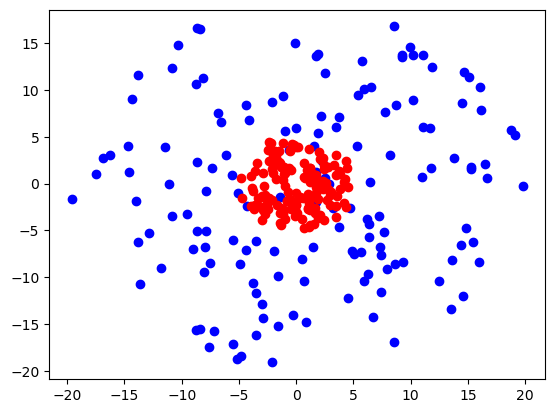

In [22]:
plt.cla()
plt.scatter(X[0:150,0],X[0:150,1], c = "b")
plt.scatter(X[150:300,0],X[150:300,1], c = "r")
plt.show()

In [23]:
def entrenamiento(X,Y, red_neuronal, lr = 0.01):

  # Output guardara el resultado de cada capa
  # En la capa 1, el resultado es el valor de entrada
  output = [X]

  for num_capa in range(len(red_neuronal)):
    z = output[-1] @ red_neuronal[num_capa].W + red_neuronal[num_capa].b

    a = red_neuronal[num_capa].funcion_act[0](z)

    # Se Incluye el resultado de la capa a output
    output.append(a)

  # Backpropagation

  back = list(range(len(output)-1))
  back.reverse()

  # Se Guardara el error de la capa en delta  
  delta = []

  for capa in back:
    # Backprop #delta

    a = output[capa+1]

    if capa == back[0]:
      x = mse(a,Y)[1] * red_neuronal[capa].funcion_act[1](a)
      delta.append(x)

    else:
      x = delta[-1] @ W_temp * red_neuronal[capa].funcion_act[1](a)
      delta.append(x)

    W_temp = red_neuronal[capa].W.transpose()

    # Gradient Descent #
    red_neuronal[capa].b = red_neuronal[capa].b - np.mean(delta[-1], axis = 0, keepdims = True) * lr
    red_neuronal[capa].W = red_neuronal[capa].W - output[capa].transpose() @ delta[-1] * lr

  return output[-1]

In [24]:
class capa():
  def __init__(self, n_neuronas_capa_anterior, n_neuronas, funcion_act):
    self.funcion_act = funcion_act
    self.b  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas).reshape(1,n_neuronas),3)
    self.W  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas * n_neuronas_capa_anterior).reshape(n_neuronas_capa_anterior,n_neuronas),3)

neuronas = [2,4,8,1] 
funciones_activacion = [relu,relu, sigmoid]
red_neuronal = []

for paso in list(range(len(neuronas)-1)):
  x = capa(neuronas[paso],neuronas[paso+1],funciones_activacion[paso])
  red_neuronal.append(x)  

In [25]:
error = []
predicciones = []

for epoch in range(0,1000):
  ronda = entrenamiento(X = X ,Y = Y ,red_neuronal = red_neuronal, lr = 0.001)
  predicciones.append(ronda)
  temp = mse(np.round(predicciones[-1]),Y)[0]
  error.append(temp)

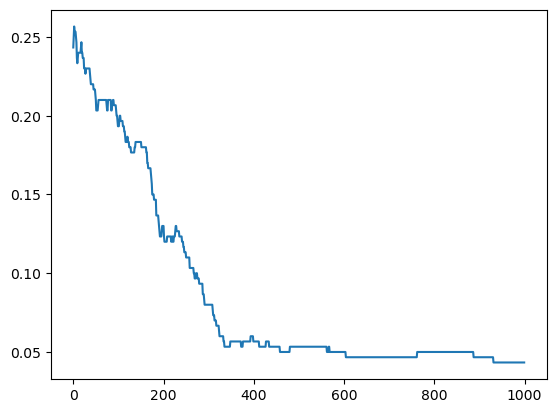

In [26]:
epoch = list(range(0,1000))
plt.plot(epoch, error)